<a href="https://colab.research.google.com/github/yamnor/TPE-AIE/blob/main/README.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TPE

## 準備



In [ ]:
!pip install py3Dmol

In [ ]:
!wget "https://raw.githubusercontent.com/yamnor/TPE-AIE/main/mep.ene"
!wget "https://raw.githubusercontent.com/yamnor/TPE-AIE/main/mep.var"
!wget "https://raw.githubusercontent.com/yamnor/TPE-AIE/main/mep.xyz"
!wget "https://raw.githubusercontent.com/yamnor/TPE-AIE/main/thf.dat"
!wget "https://raw.githubusercontent.com/yamnor/TPE-AIE/main/thf.pdb"
!wget "https://raw.githubusercontent.com/yamnor/TPE-AIE/main/agg.dat"
!wget "https://raw.githubusercontent.com/yamnor/TPE-AIE/main/agg.pdb"
!wget "https://raw.githubusercontent.com/yamnor/TPE-AIE/main/matplotlibrc"

In [ ]:
from matplotlib import pyplot as plt
import py3Dmol
import numpy as np
from ipywidgets import interact,fixed,IntSlider
import ipywidgets

In [ ]:
mep_xyz = np.array(open("mep.xyz", "r").readlines()).reshape(60, 48)
thf_pdb = open("thf.pdb", "r").read()
agg_pdb = open("agg.pdb", "r").read()

In [162]:
mep_ene = np.array([[float(xx) for xx in x.split()] for x in open("mep.ene", "r").readlines()]).T
mep_var = np.array([[float(xx) for xx in x.split()] for x in open("mep.var", "r").readlines()[1:]]).T
thf_dat = np.array([[float(xx) / 627.5095 * 27.2114 / 4.184 for xx in x.split()] for x in open("thf.dat", "r").readlines()]).T[1:]
agg_dat = np.array([[float(xx) / 627.5095 * 27.2114 / 4.184 for xx in x.split()] for x in open("agg.dat", "r").readlines()]).T[1:]

In [163]:
thf_dat = (thf_dat[0] + thf_dat[1]) / 2
agg_dat = (agg_dat[0] + agg_dat[1]) / 2

In [ ]:
def molview(xyz, type="xyz"):
  viewer = py3Dmol.view(width=400, height=400)
  viewer.addModel(xyz, type)
  viewer.setStyle({'stick':{}})
  viewer.zoomTo()
  return viewer

In [ ]:
def conf_viewer(idx):
  return molview("".join(mep_xyz[idx])).show()

In [81]:
def rcparams(plt, figsize, subplot):
  plt.rcParams["figure.figsize"]        = figsize
  plt.rcParams["figure.subplot.left"]   = subplot['left'] / figsize[0]
  plt.rcParams["figure.subplot.right"]  = 1.00 - subplot['right'] / figsize[0]
  plt.rcParams["figure.subplot.bottom"] = subplot['bottom'] / figsize[1]
  plt.rcParams["figure.subplot.top"]    = 1.00 - subplot['top'] / figsize[1]
  plt.rcParams["figure.subplot.wspace"] = subplot['wspace'] / figsize[0]
  plt.rcParams["figure.subplot.hspace"] = subplot['hspace'] / figsize[1]
  plt.rcParams["axes.grid"]             = subplot['grid']

In [104]:
subplot = {
  'left':   0.60,
  'right':  0.10,
  'bottom': 0.45,
  'top':    0.25,
  'wspace': 1.50,
  'hspace': 2.00,
  'grid': True,
}

In [149]:
def plot_mep():
  figsize = [5.0, 4.0]
  with plt.style.context('matplotlibrc'):
    rcparams(plt, figsize, subplot)
    fig, ax = plt.subplots(1,1)
  x = np.array(range(len(mep_ene[0]))) / (len(mep_ene[0]) - 1)
  ax.plot(x, mep_ene[0], label=r'S$_0$', color='#1E88E5')
  ax.plot(x, mep_ene[1], label=r'S$_1$', color='#E53935')
  ax.set_xlabel(r'$\sigma$')
  ax.set_ylabel('Energy [eV]')
  ax.legend()
  plt.show()

In [172]:
def plot_var():
  figsize = [5.0, 4.0]
  with plt.style.context('matplotlibrc'):
    rcparams(plt, figsize, subplot)
    fig, ax = plt.subplots(1,1)
  x = np.array(range(len(mep_var[0]))) / (len(mep_var[0]) - 1)
  ax.plot(x, mep_var[0], label=r'$\phi$', color='#43A047')
  ax.plot(x, mep_var[1], label=r'$\theta$', color='#FB8C00')
  ax.set_xlabel(r'$\sigma$')
  ax.set_ylabel('Angle [deg]')
  ax.set_ylim(0, 190)
  ax.legend()
  plt.show()

In [165]:
def plot_fep():
  figsize = [10.0, 4.0]
  with plt.style.context('matplotlibrc'):
    rcparams(plt, figsize, subplot)
    fig, ax = plt.subplots(1,2)
  x = np.array(range(len(mep_ene[0]))) / (len(mep_ene[0]) - 1)
  ax[0].set_title('THF')
  ax[0].plot(x, mep_ene[0] + thf_dat, label=r'S$_0$', color='#1E88E5')
  ax[0].plot(x, mep_ene[1] + thf_dat, label=r'S$_1$', color='#E53935')
  ax[1].set_title('Aggregate')
  ax[1].plot(x, mep_ene[0] + agg_dat, label=r'S$_0$', color='#1E88E5')
  ax[1].plot(x, mep_ene[1] + agg_dat, label=r'S$_1$', color='#E53935')
  for i in range(2):
    ax[i].set_xlabel(r'$\sigma$')
    ax[i].set_ylabel('Energy [eV]')
    ax[i].set_ylim(0, 5)
    ax[i].legend()
  plt.show()

## 最小エネルギー経路（MEP)

In [ ]:
interact(conf_viewer, idx=ipywidgets.IntSlider(min=0,max=59, step=1))

interactive(children=(IntSlider(value=0, description='idx', max=59), Output()), _dom_classes=('widget-interact…

<function __main__.conf_viewer>


Bad key "mathtext.fallback" on line 337 in
matplotlibrc.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.2/matplotlibrc.template
or from the matplotlib source distribution


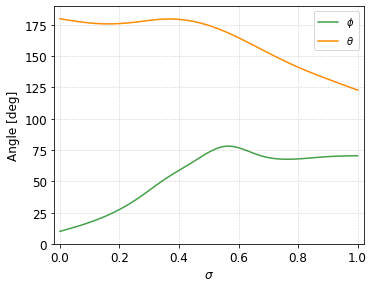

In [173]:
plot_var()


Bad key "mathtext.fallback" on line 337 in
matplotlibrc.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.2/matplotlibrc.template
or from the matplotlib source distribution


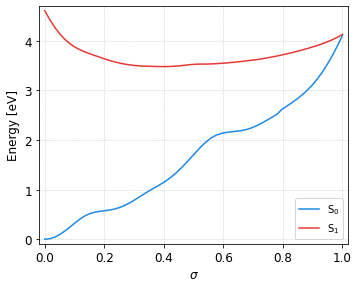

In [166]:
plot_mep()

## 自由エネルギープロファイル（FEP）

In [127]:
molview(thf_pdb, "pdb")

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [128]:
molview(agg_pdb, "pdb")

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol


Bad key "mathtext.fallback" on line 337 in
matplotlibrc.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.2/matplotlibrc.template
or from the matplotlib source distribution


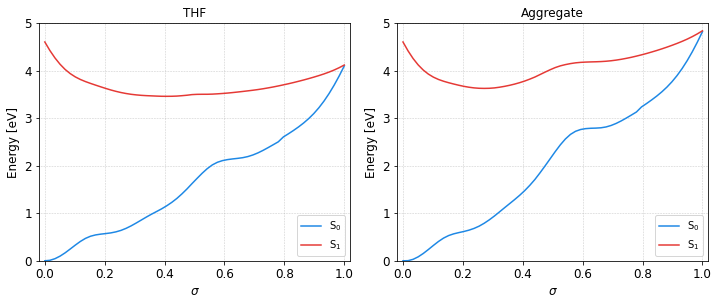

In [167]:
plot_fep()